In [1]:
import os
import pandas as pd
from src import RESULT_DIR
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from src.utils import MCC, DIS

### Results for Random Forest

In [2]:
RES_OUT_DIR = os.path.join(RESULT_DIR, 'RandomForest', 'warp', 'classification')

fold = 1
result_file = os.path.join(RES_OUT_DIR, 'results_fold{0:02}.csv'.format(fold))
res_df = pd.read_csv(result_file, index_col=0)
res_df = res_df.groupby(['step']).aggregate({'trees': np.average,
                                             'max_depth': np.average,
                                             'threshold': np.average,
                                             'tn': np.sum, 'fp': np.sum,
                                             'fn': np.sum, 'tp': np.sum,
                                             'time': np.average}).reset_index()
res_df['MCC'] = res_df.apply(lambda x: MCC(x['tn'], x['fp'], x['fn'], x['tp']), axis=1)
res_df['DIS'] = res_df.apply(lambda x: DIS(x['tn'], x['fp'], x['fn'], x['tp']), axis=1)
res_df['MCC_max'] = res_df['MCC'].cummax()
res_best = res_df[res_df['MCC'] == res_df['MCC'].max()]
res_best

,step,trees,max_depth,threshold,tn,fp,fn,tp,time,MCC,DIS,MCC_max
282,282,200.0,60.0,40.0,1942941.0,245139.0,397104.0,1727304.0,922.573205,0.703526,0.217927,0.703526


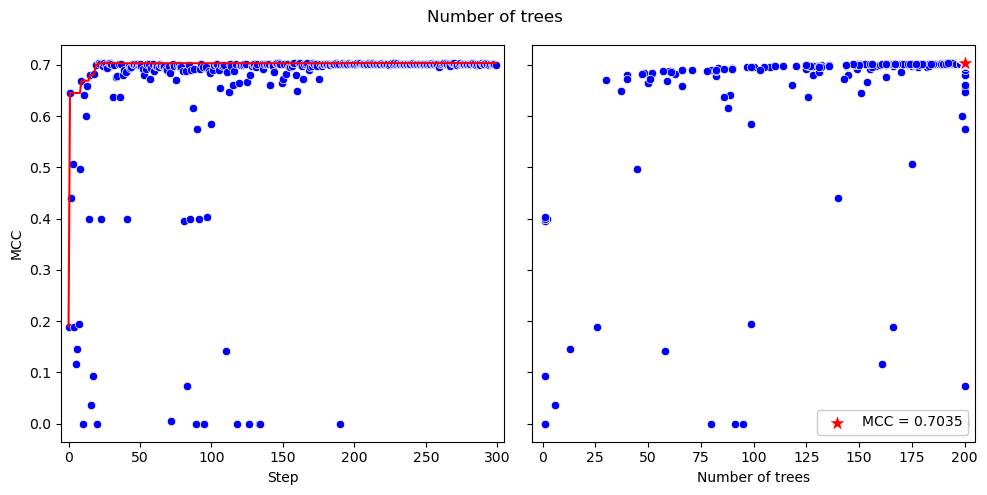

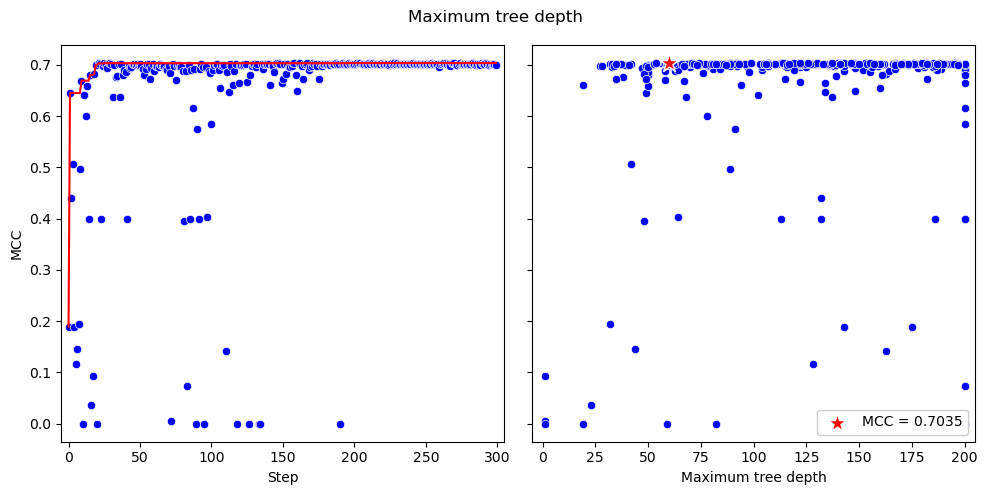

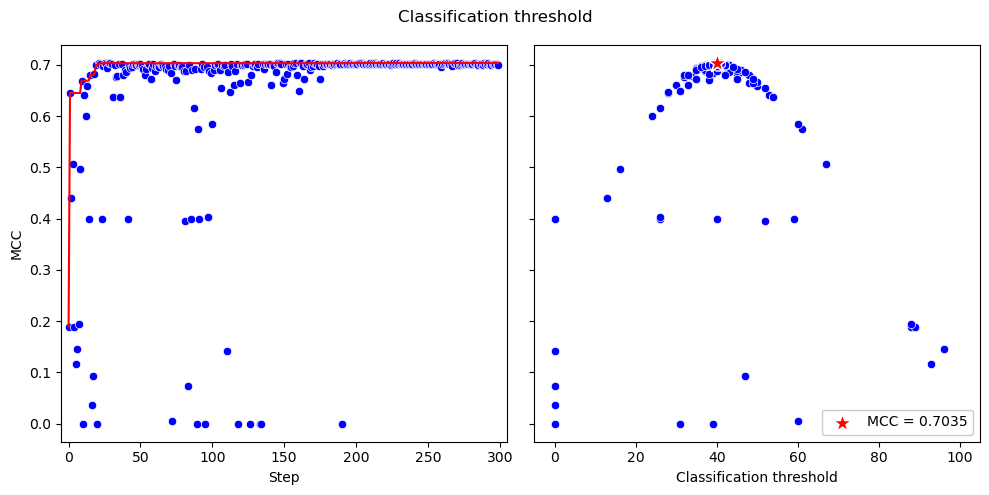

In [3]:
experiment = 'RandomForest'
titles = ['Number of trees', 'Maximum tree depth', 'Classification threshold']
vars = ['trees', 'max_depth', 'threshold']
lim_max = [200, 200, 100]

for t, v, l in zip(titles,vars,lim_max):

    fig, axes = plt.subplots(1, 2,  sharey='row', figsize=(10,5))
    fig.suptitle(t)
    # axes[0,0].set_title('Iterations x MCC')
    # axes[0,1].set_title('Number of trees x MCC')
    # axes[1,0].set_title('Number of trees x Time')

    sns.scatterplot(ax=axes[0], data=res_df, x='step', y='MCC', color='blue')
    sns.scatterplot(ax=axes[1], data=res_df, x=v, y='MCC', color='blue')
    # sns.scatterplot(ax=axes[1,0], data=res_df, x=v, y='time', color='blue')
    # sns.scatterplot(ax=axes[1,1], data=res_df, x='MCC', y='time', color='blue')

    sns.lineplot(ax=axes[0], data=res_df, x='step', y='MCC_max', color='red')
    sns.scatterplot(ax=axes[1], data=res_best, x=v, y='MCC_max', color='red', marker='*', 
                    s=200, label='MCC = {0:0.4f}'.format(res_best['MCC'].values[0]))
    axes[1].legend(loc=4, framealpha=1, shadow=False)

    axes[0].set_xlim((-5,305))
    axes[1].set_xlim((-5,l+5))
    axes[0].set_xlabel('Step')
    axes[1].set_xlabel(t)
    # axes[1,0].set_xlim((-5,205))

    fig.tight_layout()
    plt.savefig('{0}_{1}.png'.format(experiment, t.replace(' ', '_')), 
                 transparent = True, bbox_inches = 'tight', pad_inches = 0, format='png', dpi=200)
    # plt.show()


### Results LightGBM

In [4]:
RES_OUT_DIR = os.path.join(RESULT_DIR, 'LightGBM', 'warp', 'classification')

fold = 1
result_file = os.path.join(RES_OUT_DIR, 'results_fold{0:02}.csv'.format(fold))
res_df = pd.read_csv(result_file, index_col=0)

res_df = res_df.groupby(['trial']).aggregate({'num_leaves': np.average,
                                             'min_child_samples': np.average,
                                             'threshold': np.average,
                                             'tn': np.sum, 'fp': np.sum,
                                             'fn': np.sum, 'tp': np.sum,
                                             'time': np.average}).reset_index()
res_df['MCC'] = res_df.apply(lambda x: MCC(x['tn'], x['fp'], x['fn'], x['tp']), axis=1)
res_df['DIS'] = res_df.apply(lambda x: DIS(x['tn'], x['fp'], x['fn'], x['tp']), axis=1)
res_df['MCC_max'] = res_df['MCC'].cummax()
res_best = res_df[res_df['MCC'] == res_df['MCC'].max()]
res_best

,trial,num_leaves,min_child_samples,threshold,tn,fp,fn,tp,time,MCC,DIS,MCC_max
214,214,153.0,200.0,15.0,2018929.0,169151.0,224909.0,1899499.0,430.385595,0.817411,0.131089,0.817411


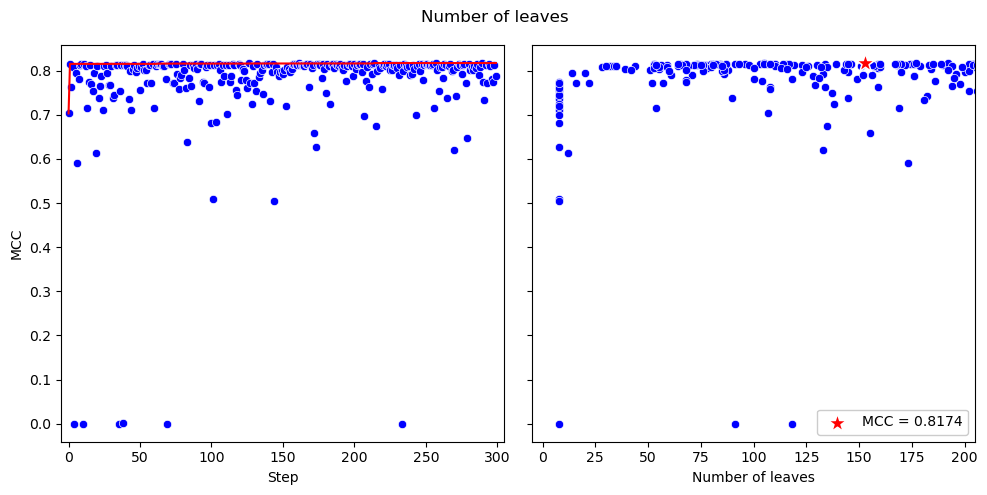

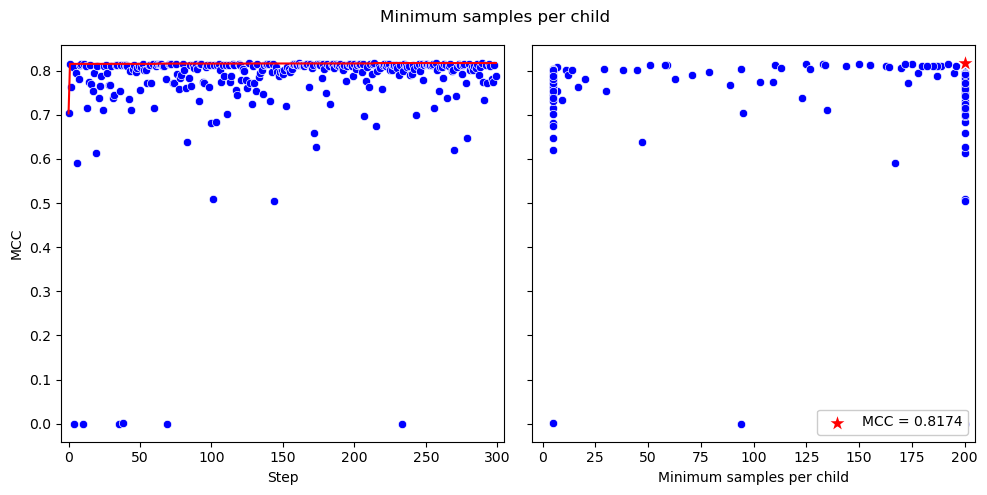

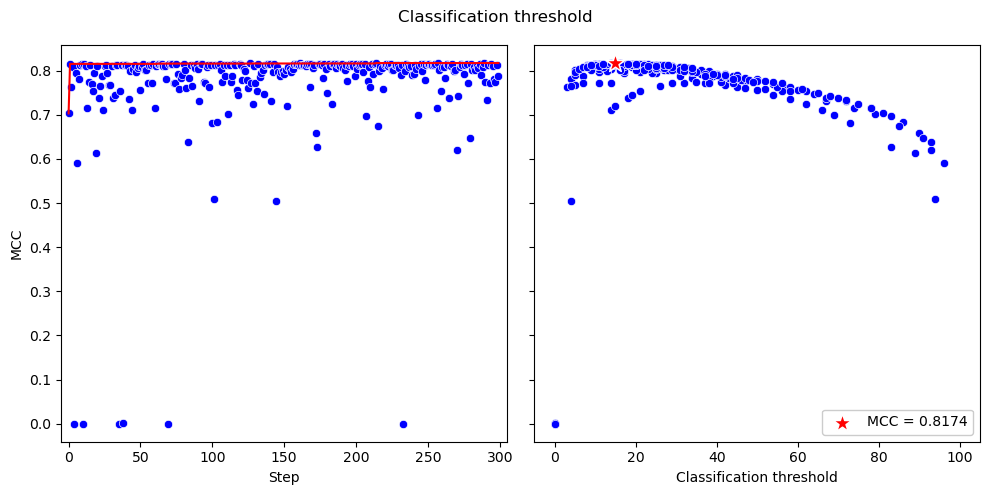

In [5]:
experiment = 'LightGBM'
titles = ['Number of leaves', 'Minimum samples per child', 'Classification threshold']
vars = ['num_leaves', 'min_child_samples', 'threshold']
lim_max = [200, 200, 100]

for t, v, l in zip(titles,vars,lim_max):

    fig, axes = plt.subplots(1, 2,  sharey='row', figsize=(10,5))
    fig.suptitle(t)
    # axes[0,0].set_title('Iterations x MCC')
    # axes[0,1].set_title('Number of trees x MCC')
    # axes[1,0].set_title('Number of trees x Time')

    sns.scatterplot(ax=axes[0], data=res_df, x='trial', y='MCC', color='blue')
    sns.scatterplot(ax=axes[1], data=res_df, x=v, y='MCC', color='blue')
    # sns.scatterplot(ax=axes[1,0], data=res_df, x=v, y='time', color='blue')
    # sns.scatterplot(ax=axes[1,1], data=res_df, x='MCC', y='time', color='blue')

    sns.lineplot(ax=axes[0], data=res_df, x='trial', y='MCC_max', color='red')
    sns.scatterplot(ax=axes[1], data=res_best, x=v, y='MCC_max', color='red', marker='*', 
                    s=200, label='MCC = {0:0.4f}'.format(res_best['MCC'].values[0]))
    axes[1].legend(loc=4, framealpha=1, shadow=False)

    axes[0].set_xlim((-5,305))
    axes[1].set_xlim((-5,l+5))
    axes[0].set_xlabel('Step')
    axes[1].set_xlabel(t)
    # axes[1,0].set_xlim((-5,205))

    fig.tight_layout()
    # plt.show()
    plt.savefig('{0}_{1}.png'.format(experiment, t.replace(' ', '_')), 
                 transparent = True, bbox_inches = 'tight', pad_inches = 0, format='png', dpi=200)


### Results Post-processing

In [6]:
RES_OUT_DIR = os.path.join(RESULT_DIR, 'LightGBM', 'warp', 'postprocessing')

fold = 1
result_file = os.path.join(RES_OUT_DIR, 'results_post_fold{0:02}.csv'.format(fold))
res_df = pd.read_csv(result_file, index_col=0)
res_df
res_df = res_df.groupby(['step']).aggregate({'threshold': np.average,
                                             'opening': np.average,
                                             'closing': np.average,
                                             'voting_depth': np.average,
                                             'voting_width': np.average,
                                             'count': np.average,
                                             'tn': np.sum, 'fp': np.sum,
                                             'fn': np.sum, 'tp': np.sum,
                                             'time': np.average}).reset_index()
res_df['MCC'] = res_df.apply(lambda x: MCC(x['tn'], x['fp'], x['fn'], x['tp']), axis=1)
res_df['DIS'] = res_df.apply(lambda x: DIS(x['tn'], x['fp'], x['fn'], x['tp']), axis=1)
res_df['MCC_max'] = res_df['MCC'].cummax()
res_best = res_df[res_df['MCC'] == res_df['MCC'].max()]
res_best

,step,threshold,opening,closing,voting_depth,voting_width,count,tn,fp,fn,tp,time,MCC,DIS,MCC_max
428,428,58.0,4.0,27.0,32.0,9.0,48.0,442281589.0,1121169.0,1035588.0,8241118.0,9.288043,0.881865,0.111662,0.881865


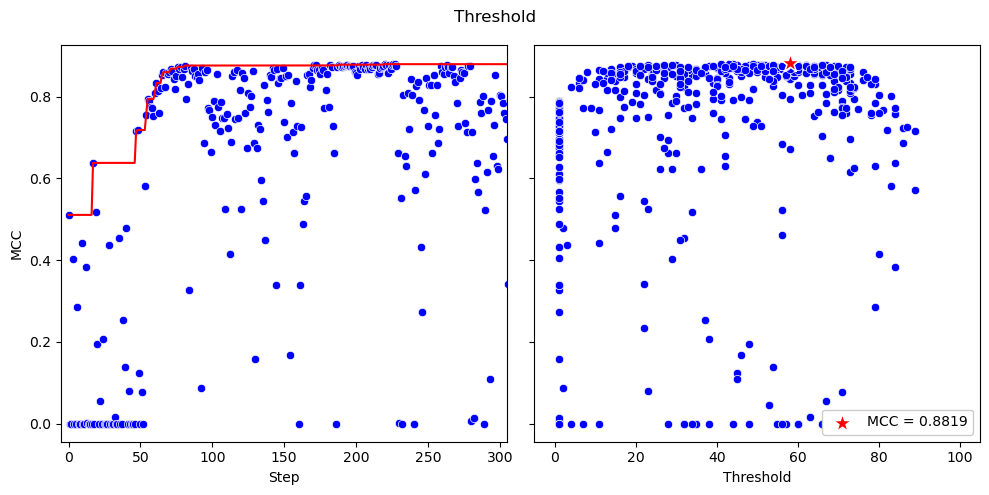

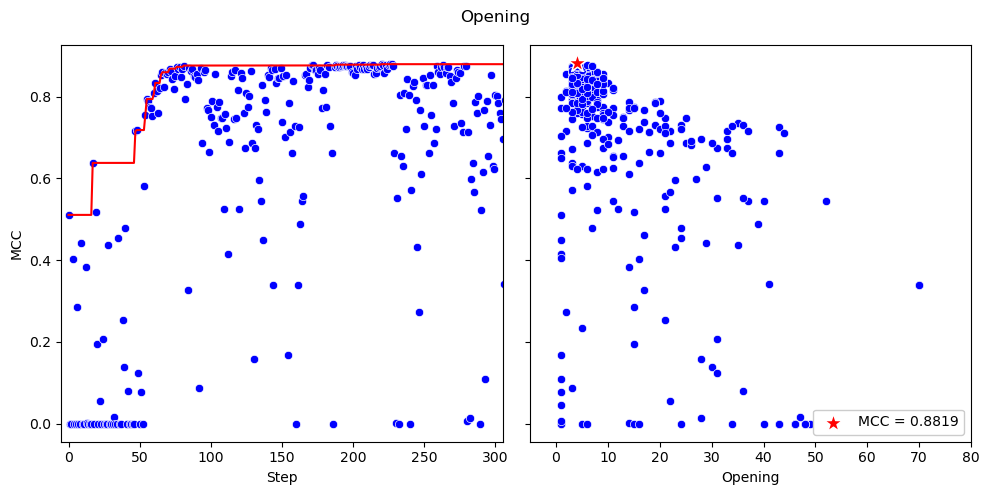

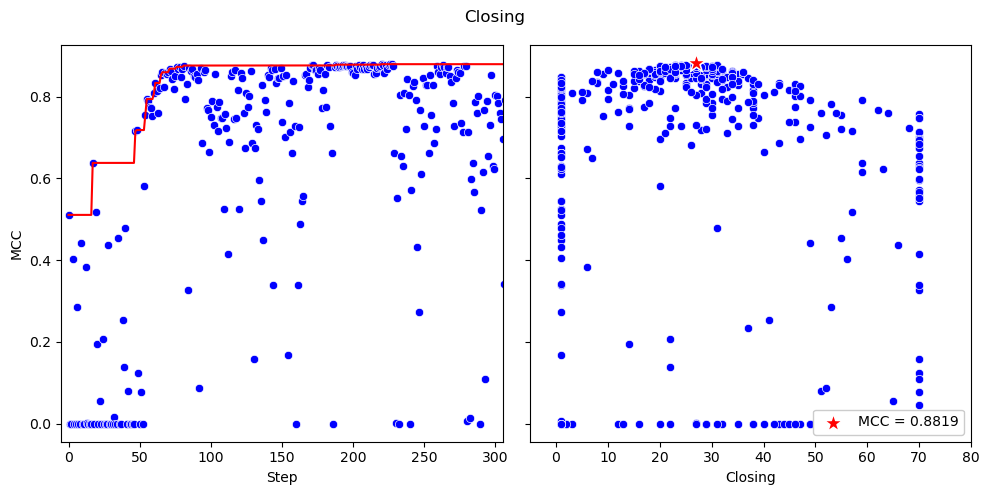

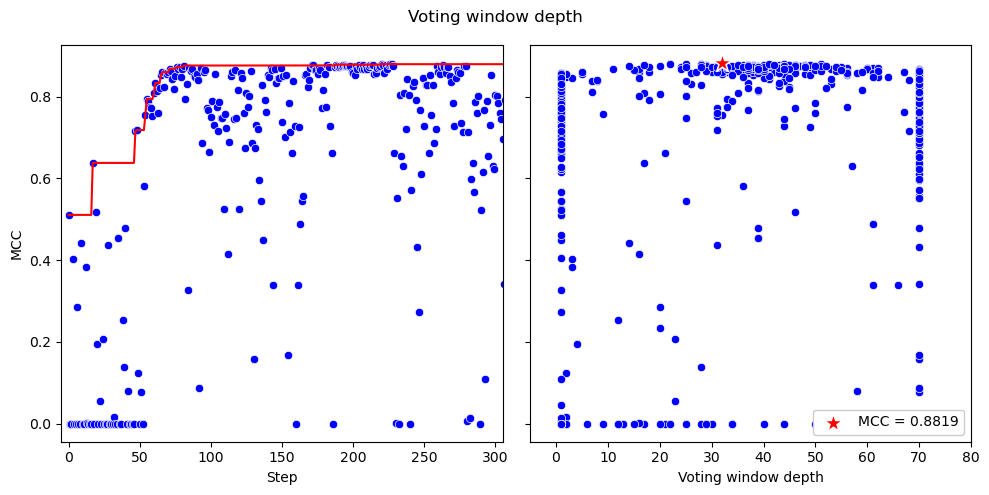

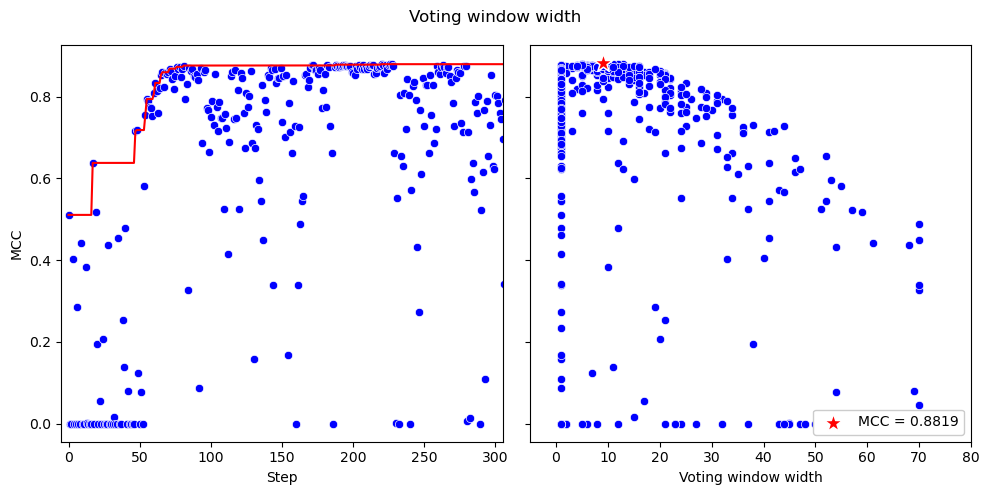

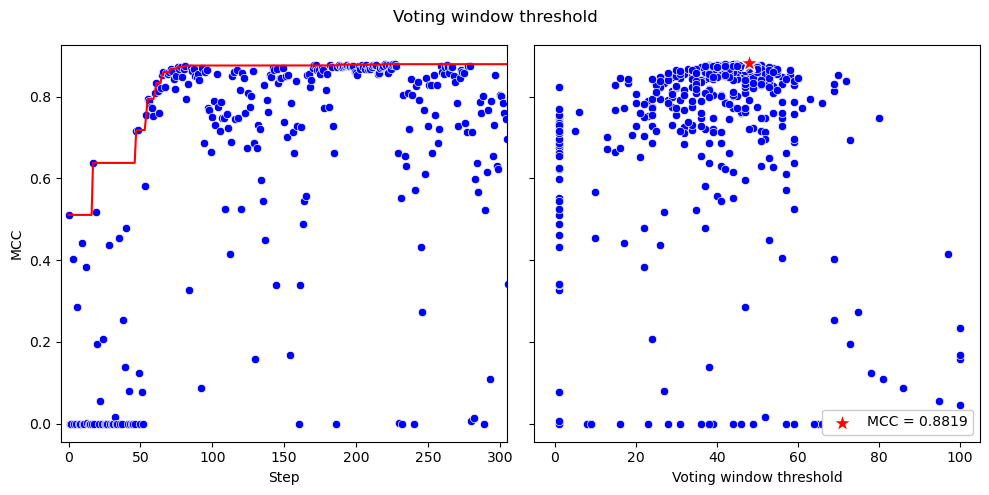

In [7]:
experiment = 'Post-processing'
titles = ['Threshold', 'Opening', 'Closing', 'Voting window depth', 'Voting window width', 'Voting window threshold']
vars = ['threshold', 'opening', 'closing', 'voting_depth', 'voting_width', 'count']
lim_max = [100, 75, 75, 75, 75, 100]

for t, v, l in zip(titles,vars,lim_max):

    fig, axes = plt.subplots(1, 2,  sharey='row', figsize=(10,5))
    fig.suptitle(t)
    # axes[0,0].set_title('Iterations x MCC')
    # axes[0,1].set_title('Number of trees x MCC')
    # axes[1,0].set_title('Number of trees x Time')

    sns.scatterplot(ax=axes[0], data=res_df, x='step', y='MCC', color='blue')
    sns.scatterplot(ax=axes[1], data=res_df, x=v, y='MCC', color='blue')
    # sns.scatterplot(ax=axes[1,0], data=res_df, x=v, y='time', color='blue')
    # sns.scatterplot(ax=axes[1,1], data=res_df, x='MCC', y='time', color='blue')

    sns.lineplot(ax=axes[0], data=res_df, x='step', y='MCC_max', color='red')
    sns.scatterplot(ax=axes[1], data=res_best, x=v, y='MCC_max', color='red', marker='*', 
                    s=200, label='MCC = {0:0.4f}'.format(res_best['MCC'].values[0]))
    axes[1].legend(loc=4, framealpha=1, shadow=False)

    axes[0].set_xlim((-5,305))
    axes[1].set_xlim((-5,l+5))
    axes[0].set_xlabel('Step')
    axes[1].set_xlabel(t)
    # axes[1,0].set_xlim((-5,205))

    fig.tight_layout()
    # plt.show()
    plt.savefig('{0}_{1}.png'.format(experiment, t.replace(' ', '_')), 
                 transparent = True, bbox_inches = 'tight', pad_inches = 0, format='png', dpi=200)